### Sequence Position Difference & Graph 


| Sample | Sequence | Variants |
| --- | --- | --- |
| Reference | AGTGCACT | 0 |
| A. | A<span style="color:red">A</span>TGCACT | 1-0 |
| B. | <span style="color:blue">T</span>GTGCACT | 1-1 |
| C. | A<span style="color:red">C</span>TGCAC<span style="color:green">C</span>| 2-0 |
| D. | AGTGCA<span style="color:blue">A</span><span style="color:coral">G</span>| 2-1 |

In [1]:
f = open("dna_sequence.txt", "r").read()
test_list = f.split()
s = ''.join(test_list)
n = 8
chunks = [s[i:i+n] for i in range(0, len(s), n)]
chunks[:7]

['ATTAAAGG',
 'TTTATACC',
 'TTCCCAGG',
 'TAACAAAC',
 'CAACCAAC',
 'TTTCGATC',
 'TCTTGTAG']

In [4]:
def compare(reference,y):
    a = []
    for i in range(8):        
        if reference[i] != y[i] :
            a.append(i)
    return a 

reference = chunks[0]       


def count_var1(chunks, reference, p):
    
    b = []
    c = []
    for k in range(len(chunks[:-1])):
        a = compare(reference, chunks[k])
        
        if len(a) == p:
            b.append(a)
            c.append(k)    
    return b, c

k = 0
variant = []
variants = []
for p in range(1,8):
    
    c = len(count_var1(chunks, chunks[14], p)[0]) 
    b = count_var1(chunks, chunks[14], p)
    
    if c > 0:
        k = k + 1
        j = 0
        for x in b[1]:
            variants.append((chunks[x], k, j))
            j = j + 1
        
        

In [6]:
#variants = max 7
variants_dict = {}
xx = variants[0]
def variants_append(variants, x,variants_dict,i):
    a = []
    for k in variants:
        if k[1] ==i:
            a.append(k)
    variants_dict[i] = a
    return variants_dict
#chunk_append(chunks, dp, x,chunk_dict,2)
for p in range(8):
    variants_append(variants, xx, variants_dict, p)
variants_dict

{0: [],
 1: [('AATGCACT', 1, 0), ('TGTGCACT', 1, 1)],
 2: [('ACTGCACC', 2, 0),
  ('AGTGCAAG', 2, 1),
  ('AGTGGAGT', 2, 2),
  ('ACTGCATT', 2, 3),
  ('TGTGTACT', 2, 4),
  ('AGTACATT', 2, 5),
  ('ATAGCACT', 2, 6),
  ('AGTTTACT', 2, 7),
  ('AGTACAAT', 2, 8),
  ('AATACACT', 2, 9),
  ('CTTGCACT', 2, 10),
  ('AGTGAAGT', 2, 11),
  ('AGTGCTTT', 2, 12),
  ('ACTGCACA', 2, 13),
  ('TGTGCACA', 2, 14),
  ('AATACACT', 2, 15),
  ('TCTGCACT', 2, 16),
  ('AATGCACA', 2, 17),
  ('GGTGCAAT', 2, 18),
  ('ACTTCACT', 2, 19),
  ('TTTGCACT', 2, 20)],
 3: [('TGTGCCTT', 3, 0),
  ('AGTGTGCC', 3, 1),
  ('TATGCATT', 3, 2),
  ('AGAGAAGT', 3, 3),
  ('ATGACACT', 3, 4),
  ('GTTGAACT', 3, 5),
  ('AGGACAAT', 3, 6),
  ('ATGGAACT', 3, 7),
  ('AGTGAATA', 3, 8),
  ('AATGGACC', 3, 9),
  ('ACATCACT', 3, 10),
  ('GTGGCACT', 3, 11),
  ('ACTGAAAT', 3, 12),
  ('AGTGCTTA', 3, 13),
  ('AGTGTATA', 3, 14),
  ('TGAGTACT', 3, 15),
  ('ATCACACT', 3, 16),
  ('TGGGCACA', 3, 17),
  ('TATGAACT', 3, 18),
  ('AGTCACCT', 3, 19),
  ('ATGTCACT', 3

In [7]:
import networkx as nx
import matplotlib.pyplot as plt


                    
def BFS(G, source, pos): 
    visited = set()
    queue = []		#a queue for BFS traversal
    queue.append(source)
    
    visited.add(source)
    while queue:
        curr_node = queue.pop(0)
        for i in G[curr_node]:  #iterates through all the possible vertices adjacent to the curr_node
            if i not in visited:
                queue.append(i)
                visited.add(i)
                # nx.draw_networkx_edges(G, pos, edgelist = [(curr_node,i)], width = 2.5, alpha = 0.6, edge_color = 'r')
    return


def CreateGraph(variants_dict):
    
    G = nx.Graph()
    source = variants[0][0]
    for k in range(7):
        for variant1 in variants_dict[k]:
            i = 0
            for variant2 in variants_dict[k+1]:
                if (i < 5):
                    G.add_edge(variant1[0], variant2[0], length = 10)
                    i = i + 1
    return G, source


def DrawGraph(G):
    
    #pos = nx.spring_layout(G)
    
    nx.draw_networkx(G, with_labels = True, alpha = 0.8, node_size = 500, font_size = 5, edge_color = "gray", cmap=plt.cm.Blues)  #with_labels=true is to show the node number in the output graph
    edge_labels = [[((u,v,), len(d)) for u, v, d in G.edges(data = True)][:10]]
    nx.draw_networkx_edge_labels(G, edge_labels = edge_labels, font_size = 11) #prints weight on all the edges
    return pos


TypeError: draw_networkx_edge_labels() missing 1 required positional argument: 'pos'

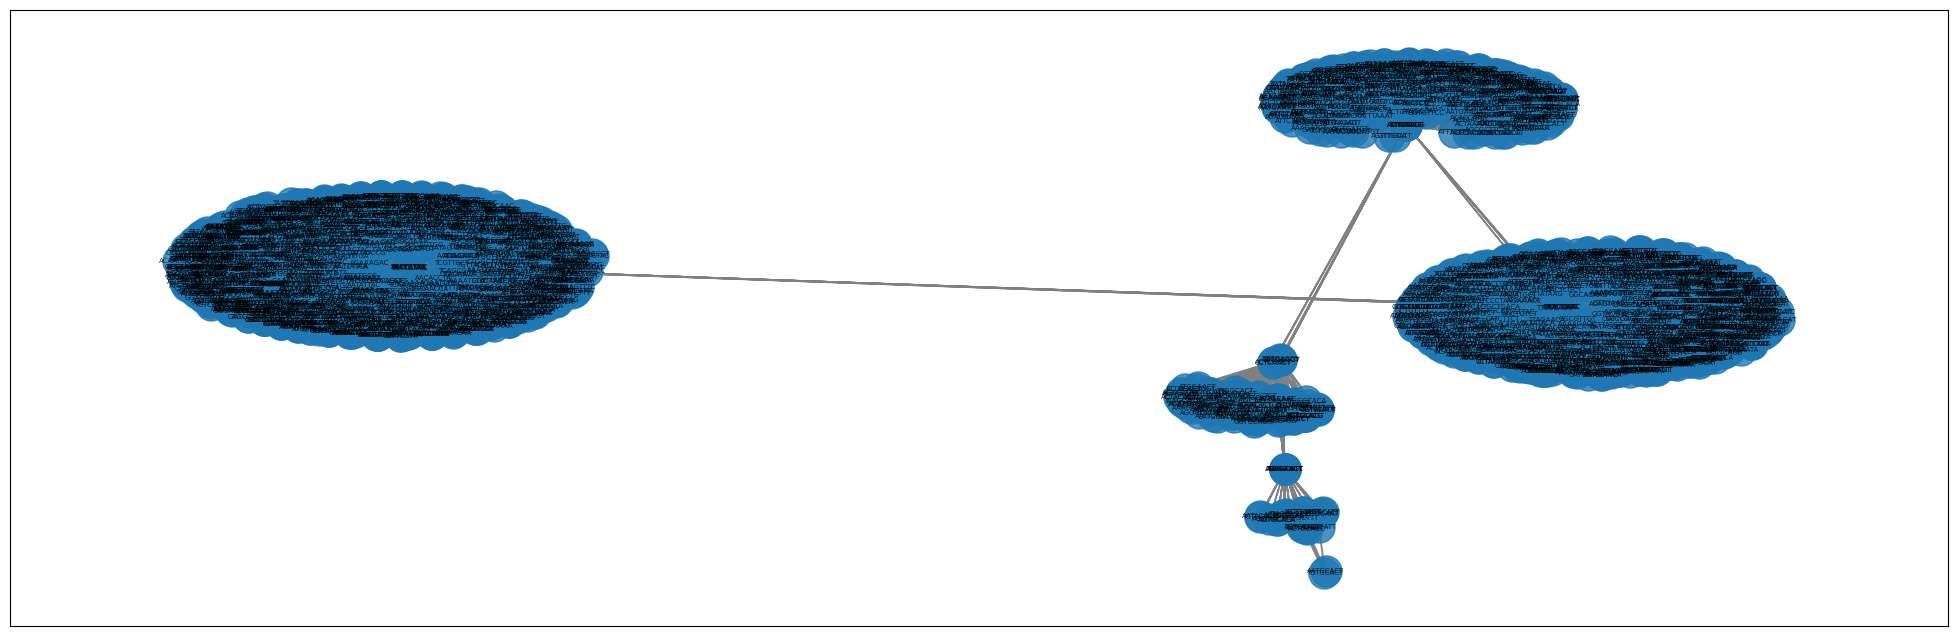

In [8]:
G,source = CreateGraph(variants_dict) 
plt.figure(figsize =(25, 8))
pos = DrawGraph(G)
BFS(G, source, pos)
plt.show()
#edge_labels = [[(u,v), len(d)] for u, v,d in G.edges(data = True)]
